<a href="https://colab.research.google.com/github/SK6300/CHURN-GUARD/blob/main/ChurnGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Upload chesina file name 'E Commerce Dataset.xlsx' ayithe kindha line ni run chey
# File name vere unte, exact ga ade name ikkada rayali.
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

# Data loading correct ga ayyindo ledo chuddam
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
df = df.fillna(df.median(numeric_only=True))
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


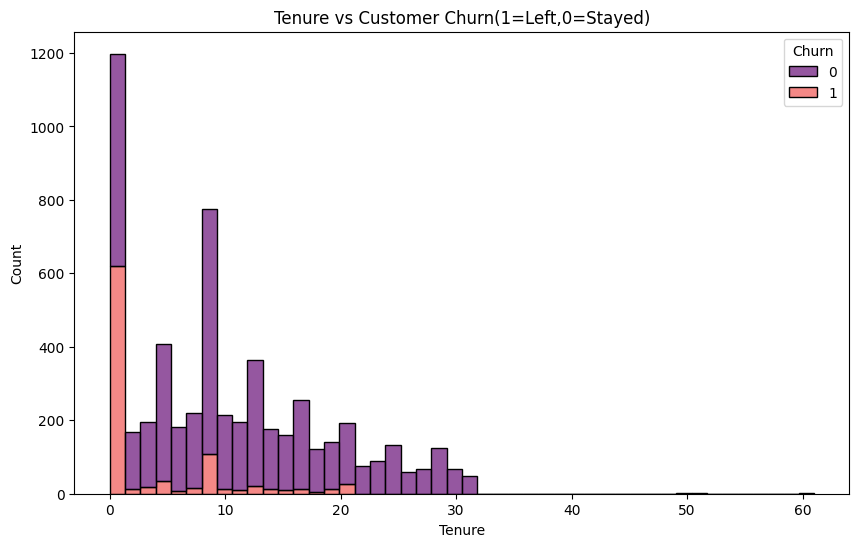

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Tenure',hue='Churn',multiple='stack',palette='magma')
plt.title('Tenure vs Customer Churn(1=Left,0=Stayed)')
plt.show()

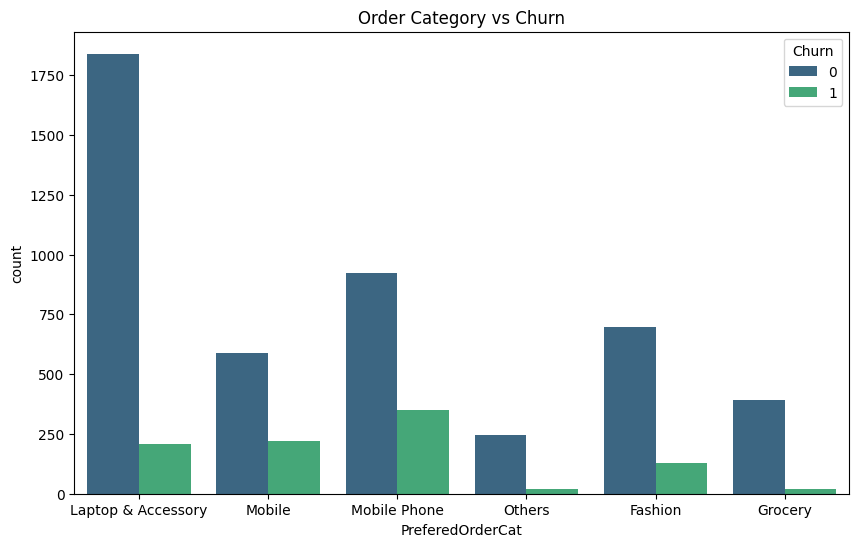

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='PreferedOrderCat',hue='Churn',palette='viridis')
plt.title('Order Category vs Churn')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
text_cols=df.select_dtypes(include=['object']).columns

for col in text_cols:
  df[col]=le.fit_transform(df[col])

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,2,1,12.0,0,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('Churn',axis=1)
y=df['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Data split successfilly! Training set size:",X_train.shape)

Data split successfilly! Training set size: (4504, 19)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

model=RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("\nDetailed Report:\n",classification_report(y_test,y_pred))

Accuracy Score: 0.9715808170515098

Detailed Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       1.00      0.83      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126



/tmp/ipython-input-926738768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')


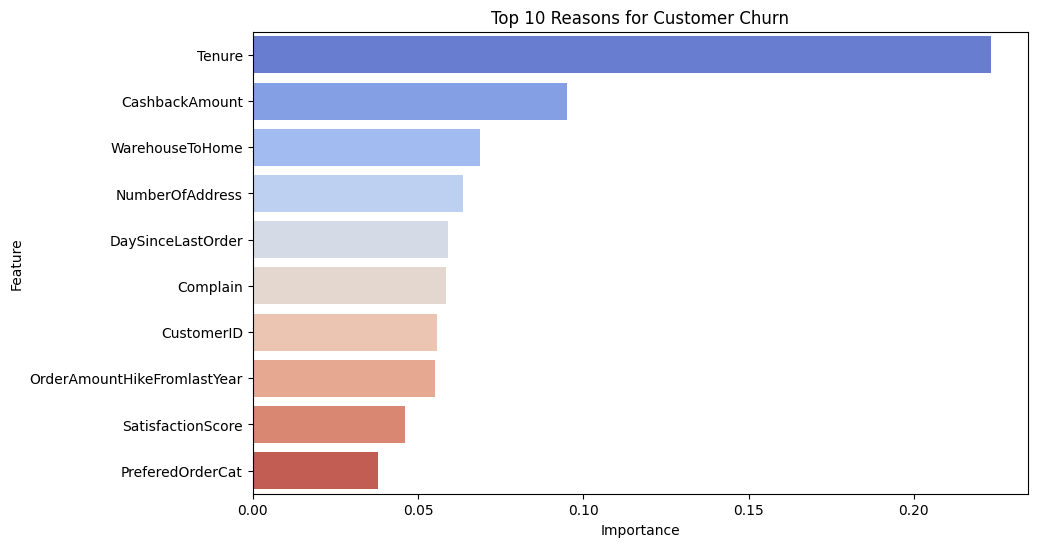

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ae features (reasons) valla churn ekkuva undo chuddam
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')
plt.title('Top 10 Reasons for Customer Churn')
plt.show()